<a href="https://colab.research.google.com/github/Yash-2842/The-Spark-Foundation-Internship/blob/master/Task2_Prediction_using_Unsupervised_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#GRIP NOV 2022
#AUTHOR: PRAJAPATI YASH HASMUKHBHAI
#TASK-2: From the given iris dataset predict the optimum number of clusters and represent it visually.

In [1]:
#step:1 importing libraries
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [2]:
#step:2 importing data
df=pd.read_csv(r"/content/drive/MyDrive/Spark Foundation Internship/Iris.csv")

In [3]:
#step:3 overview of data
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#step:4 getting data statistics
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
#step:5 getting data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
#step:6 preprocessing of data
df.drop(['Id','Species'],axis=1,inplace=True)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [7]:
#step:7 divide data into input
x=df.iloc[:,[0,1,2,3]].values

In [8]:
#step:8 KMeans clustering using elbow method
wss=[]
for i in range(1,10):
    kmeans=KMeans(i)
    kmeans.fit(x)
    wss_iter=kmeans.inertia_
    wss.append(wss_iter)
wss

[680.8244000000001,
 152.36870647733906,
 78.940841426146,
 57.34540931571814,
 46.53558205128205,
 38.930963049671746,
 34.1967910993998,
 30.20078759733558,
 28.115534535639807]

Text(0, 0.5, 'Within clusters sum of squares')

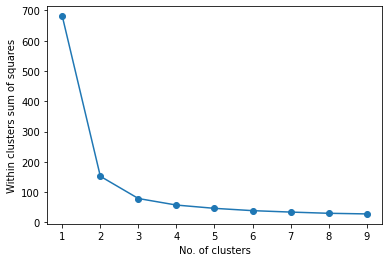

In [9]:
#step:9 plotting line graph for above elbow method
no_cluster=range(1,10)
plt.plot(no_cluster,wss,"o-")
plt.xlabel("No. of clusters")
plt.ylabel("Within clusters sum of squares")

In [10]:
kmeans=KMeans(n_clusters=3,init="k-means++",max_iter=300, n_init=10,random_state=0)
y_means=kmeans.fit_predict(x)
y_means

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

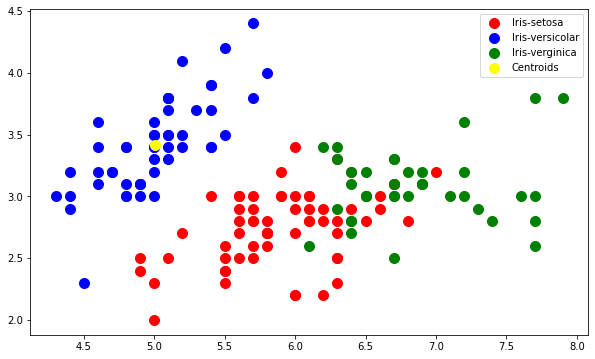

In [11]:
#step:10 visualization of clusters
plt.figure(figsize=(10,6))
plt.scatter(x[y_means==0,0],x[y_means==0,1],s=100,c="red",label="Iris-setosa")
plt.scatter(x[y_means==1,0],x[y_means==1,1],s=100,c="blue",label="Iris-versicolar")
plt.scatter(x[y_means==2,0],x[y_means==2,1],s=100,c="green",label="Iris-verginica")
plt.scatter(kmeans.cluster_centers_[1,0],kmeans.cluster_centers_[1,1],s=100,c="yellow",label="Centroids")
plt.legend()

#Hence there are three clusters